# 5. Vizualizacija podatkov

(pripravil Tomislav Kartalov, FEEIT, CMUS, Makedonija)

V tem poglavju se boste naučili **predstaviti podatke** v različnih vizualnih kontekstih in vzorcih. Potrebni orodji sta **Jupyter Notebook** in **Python**.

Vizualizacija je pomembna za razumevanje podatkov, saj jih postavi v vizualni kontekst, tako da je mogoče odkriti **vzorce, trende in korelacije**.

## 5.1. Ustvarjanje in uvoz podatkovne zbirke

Nabor podatkov lahko ustvarite ročno ali pa ga pridobite z interneta, in sicer iz storitev, kot je [kaggle](https://www.kaggle.com/datasets). Več o upravljanju nabora podatkov najdete v poglavju 3.

Prepričajte se, da so vaši podatki urejeni v obliki **csv** (vrednosti, ločene z vejico) in shranjeni kot datoteka na vašem računalniku.

V naslednjih primerih bomo uporabili podatkovno zbirko [Uspešnost študentov pri izpitih](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams), vendar lahko uporabite kateri koli podatkovni niz. Datoteka v računalniku se imenuje *exams.csv*.

Naslednja koda bo uvozila knjižnico *pandas* za manipulacijo in analizo podatkov ter knjižnico *numpy* za matematične funkcije visoke ravni:

In [1]:
import pandas as pd
import numpy as np

Zdaj lahko uvozite zbirko podatkov in si jo ogledate:

In [2]:
Students = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/05/exams.csv')
Students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Prav tako lahko preverite podatkovno zbirko in strukturo podatkov v naboru podatkov:

In [3]:
Students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


V nadaljevanju sta predstavljeni dve različni knjižnici za vizualizacijo podatkov, **seaborn** in **pyplot** , od katerih ima vsaka posebne prednosti pred drugo. Na splošno se *pyplot* uporablja za izdelavo osnovnih grafov, ki so sestavljeni iz črt, ploskev, krožnih diagramov, stolpčnih grafov itd., medtem ko *seaborn* uporablja vzorčno predstavitev. Sintaksa *pyplot* je nekoliko bolj zapletena, vendar tudi bolj robustna in prilagodljiva kot sintaksa *seaborn*.

## 5.2. Knjižnica seaborn

Knjižnica seaborn je odlična za izvajanje statističnih analiz ter za dobro raziskovanje in razumevanje podatkov. Tukaj je eden od možnih načinov uvoza knjižnice in nastavitve barvnih palet:

In [4]:
import seaborn as sbn
sbn.set(color_codes=True)

Sedaj lahko analiziramo univariatno, bivariatno ali multivariatno statistiko podatkovnega niza. Če začnemo z nečim preprostim, kot je porazdelitev študentov po spolu, bi bilo to naslednje:

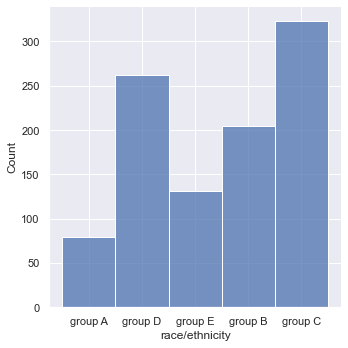

In [5]:
sbn.displot(Students['race/ethnicity'])

*Vaja*: namesto spola poskusite z drugimi parametri!

Primer bivariatne statistike, vizualno korelacijo med rezultati branja in pisanja, lahko preprosto dobite z uporabo:

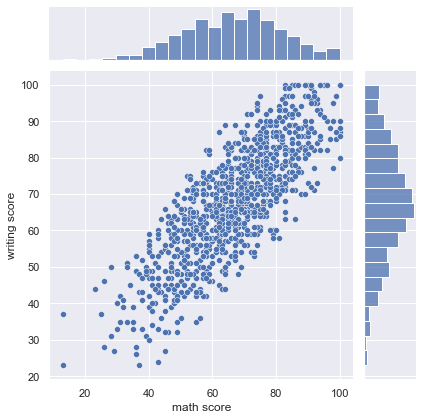

In [6]:
sbn.jointplot(data=Students, x="math score", y="writing score")

*Vaja*: poskusite enega od parametrov zamenjati z matematičnim rezultatom! Ali lahko opazite slabitev korelacije? Ali jo lahko razložite?

Obarvanost podatkovnih točk lahko naredite tudi odvisno od nekaterih podatkovnih parametrov, s čimer naredite pomembna spoznanja. Na primer, vpliv udeležbe na tečaju za pripravo na teste na rezultat izpitov lahko vizualizirate z:

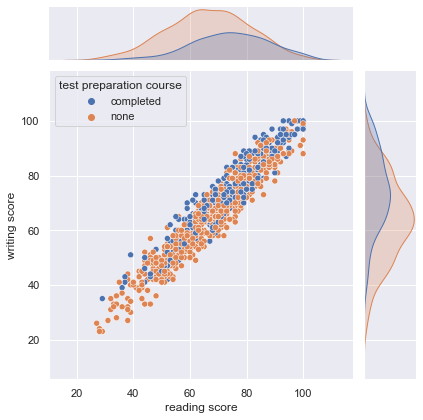

In [25]:
sbn.jointplot(data=Students, x="reading score", y="writing score", hue = 'test preparation course')

*Vaja*: opazujte vpliv nekaterih drugih parametrov, spola, rase, stopnje izobrazbe staršev... ali lahko opazite statistično pomembnost?

Če nismo prepričani, kateri parametri v naboru podatkov so povezani, je funkcija *pairplot* odličen način za samodejno ustvarjanje grafov parnih povezav med ustreznimi parametri v naboru podatkov:

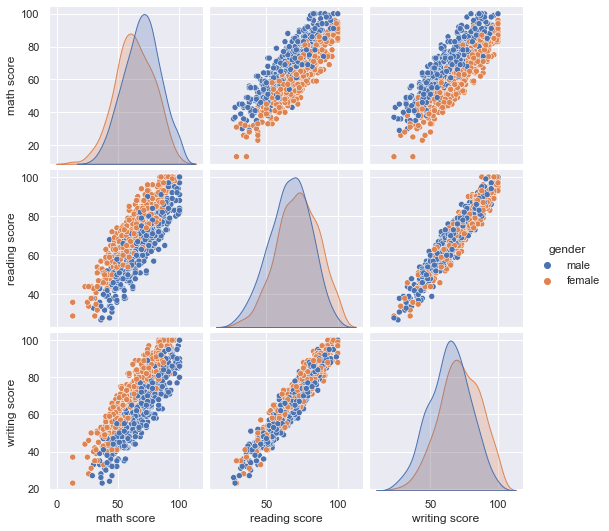

In [8]:
sbn.pairplot(Students, hue='gender')

S tem se ustvari mreža slik, ki preučuje bivariatne odnose med vsakim parom parametrov. Diagrami v glavni diagonali so diagrami enodimenzionalne porazdelitve.

Mrežo je mogoče tudi preurediti, tako da se prikaže podmnožica parametrov ali da se v vrsticah in stolpcih izrišejo različne spremenljivke:

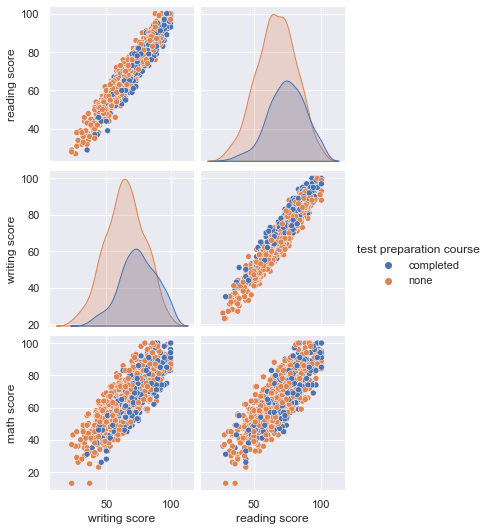

In [9]:
sbn.pairplot(Students,x_vars=['writing score','reading score'],y_vars=['reading score','writing score','math score'],hue='test preparation course')

*Daljša vaja*: eksperimentirajte z drugimi vizualizacijskimi funkcijami iz knjižnice [seaborn](https://seaborn.pydata.org/index.html), npr. stripplot, boxplot, barplot, countplot ...

## 5.3. Knjižnica pyplot

Pyplot je modul paketa **matplotlib**, zmogljive knjižnice za izrisovanje grafikonov za Python in NumPy. Zagotavlja objektno orientiran API za risanje grafov in njihovo vstavljanje v aplikacije. Čeprav lahko izdela podobne vizualizacije kot seaborn, je sintaksa za njihovo pridobitev nekoliko bolj zapletena. Seaborn ima implementiranih nekaj funkcij višje ravni za statistično analizo, medtem ko ima pyplot bolj postopen pristop in širši nadzor nad parametri izrisa.
Tukaj je eden od možnih načinov uvoza pyplota:

In [11]:
from matplotlib import pyplot as plt

Sedaj lahko analiziramo univariatno, bivariatno ali multivariatno statistiko podatkovnega niza. Uvoziti je treba tudi Pandas, numpy in podatkovni niz *Students* (glejte začetek tega predavanja).
Če začnemo z nečim preprostim, kot je porazdelitev študentov po spolu, lahko naredimo naslednje:

<BarContainer object of 2 artists>

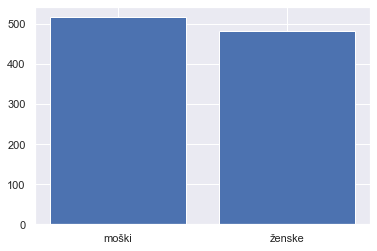

In [27]:
counts = Students.gender.value_counts()
plt.bar(["moški","ženske"],counts)

Upoštevajte, da je grafikon nekoliko podoben grafikonu, ki ga je pridobil seaborn, vendar je postopek njegove izdelave popolnoma drugačen. Seaborn samodejno izvede štetje in poimenovanje stolpcev, medtem ko tukaj izrecno navedemo, kaj želimo v grafu. Slednje je nekoliko bolj zamudno, vendar nam daje več nadzora in možnosti za prilagajanje.
Poskusimo iste podatke vnesti v drugo vrsto grafikona:

([<matplotlib.patches.Wedge at 0x1608fbf9d00>,
 [Text(-0.05871992619937442, 1.0984315956249346, 'moški'),
  Text(0.058720029041962135, -1.0984315901271737, 'ženske')])

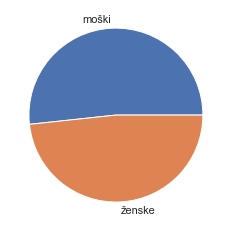

In [28]:
plt.pie(counts, labels =["moški","ženske"] )

*Daljša vaja*: eksperimentirajte s široko paleto parametrov vizualizacije, kot so *eksplodiranje*, *barve*, *senca*, *začetni kot* itd. O pravilni sintaksi si lahko preberete tukaj [matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

Sedaj poskusimo ponoviti grafikon bivariatne statistike, vizualno korelacijo med rezultati branja in pisanja:

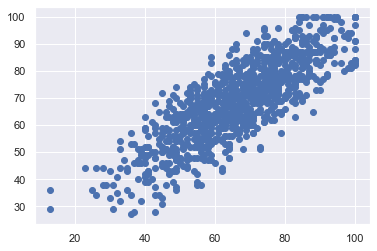

In [14]:
plt.scatter(Students['math score'],Students['reading score'])

Ta graf je osnovna oblika podatkov. Dodamo mu lahko nekaj likov in ga naredimo bolj informativnega:

Text(0, 0.5, 'branje')

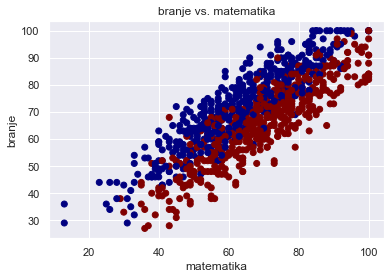

In [29]:
plt.scatter(Students['math score'],Students['reading score'],c=Students['gender']=="male",cmap='jet')
plt.title("branje vs. matematika")
plt.xlabel("matematika")
plt.ylabel("branje")

*Vaja*: poskusite v tabelo vnesti različne podatke (pisanje, branje, matematika). Igrajte se z barvami. O pravilni sintaksi si lahko preberete tukaj [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

Pomemben vidik vizualizacije podatkov so **linijski diagrami**. Ti se pogosto uporabljajo za predstavitev zveznih podatkov ter za razumevanje njihovih vzorcev in trendov. Pyplot je še posebej zmogljivo orodje za risanje in prilagajanje linijskih grafov. Za ponazoritev tega bomo uvozili še en niz podatkov: [Svetovno prebivalstvo 1960-2018](https://www.kaggle.com/datasets/imdevskp/world-population-19602018?select=population_total_long.csv).
(prepričajte se, da je datoteka *csv* prenesena v vaš računalnik).

In [16]:
Population = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/05/population_total_long.csv')
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12595 entries, 0 to 12594
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryName  12595 non-null  object
 1   Year         12595 non-null  int64 
 2   Count        12595 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 295.3+ KB


Poskusimo prikazati število prebivalcev Makedonije skozi leta. Najprej moramo podatke za Makedonijo ločiti od podatkov za druge države:

In [17]:
Macedonia = Population[Population.CountryName == 'Macedonia']

Sedaj lahko izrišemo potek števila prebivalcev skozi leta. Na vodoravni osi so leta, na navpični pa število prebivalcev.

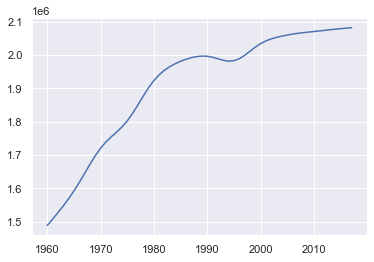

In [18]:
plt.plot(Macedonia.Year, Macedonia.Count)

Upoštevajte številko 1e6 nad levim zgornjim kotom grafa. Ta številka kaže, da je treba številke, označene na navpični osi, pomnožiti s tem faktorjem. Če želimo prikazati številke, ki so že pretvorjene v milijone, lahko izvedemo naslednje:

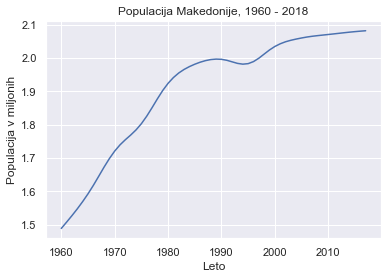

In [30]:
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.title("Populacija Makedonije, 1960 - 2018")
plt.xlabel("Leto")
plt.ylabel("Populacija v miljonih")
plt.show()

*Vaja*: poskusite narisati podatke za svojo državo ali za kakšno drugo državo na svetu. Imena držav, vključenih v podatke, lahko vidite, če odprete podatke za predogled ali pa neposredno odprete shranjeno datoteko csv.

Zdaj poskusite primerjati število prebivalcev v Makedoniji in Sloveniji skozi leta (ne pozabite najprej izločiti podatkov):

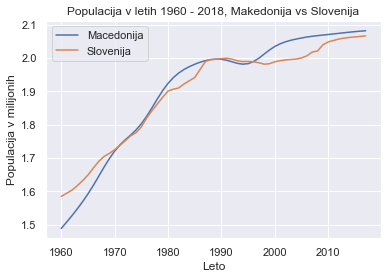

In [36]:
Slovenia = Population[Population.CountryName == 'Slovenia']
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.title("Populacija v letih 1960 - 2018, Makedonija vs Slovenija")
plt.xlabel("Leto")
plt.ylabel("Populacija v milijonih")
plt.legend(["Macedonija","Slovenija"])
plt.show()

Dodajmo še Srbijo:

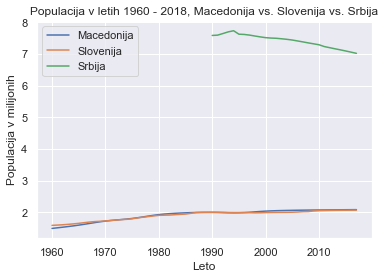

In [35]:
Serbia = Population[Population.CountryName == 'Serbia']
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.plot(Serbia.Year, Serbia.Count / 10**6)
plt.title("Populacija v letih 1960 - 2018, Macedonija vs. Slovenija vs. Srbija")
plt.xlabel("Leto")
plt.ylabel("Populacija v milijonih")
plt.legend(["Macedonija","Slovenija", "Srbija"])
plt.show()

Vidimo, da so podatki za Srbijo nepopolni in se začnejo šele leta 1990. Če želimo prikazati le območje, kjer so na voljo podatki za vse tri države, lahko vodoravno os omejimo:

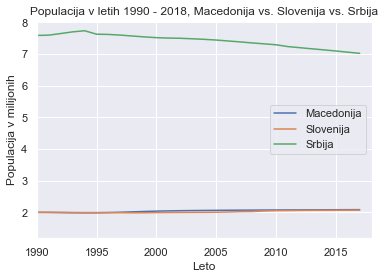

In [34]:
Serbia = Population[Population.CountryName == 'Serbia']
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.plot(Serbia.Year, Serbia.Count / 10**6)
plt.xlim([1990,2018])
plt.title("Populacija v letih 1990 - 2018, Macedonija vs. Slovenija vs. Srbija")
plt.xlabel("Leto")
plt.ylabel("Populacija v milijonih")
plt.legend(["Macedonija","Slovenija", "Srbija"])
plt.show()

Opazujte, kako se je legenda samodejno premaknila na drugo mesto, da ne bi motila črt.

Zaradi absolutnega števila prebivalcev, prikazanega na istem grafu, sta črti za Makedonijo in Slovenijo zelo blizu druga drugi, saj sta obe majhni v primerjavi s številom prebivalcev Srbije. Vendar bi bil morda bolj informativen graf relativne rasti prebivalstva skozi leta. Da bi bili podatki relativni, moramo določiti referenčno prebivalstvo. Recimo, da bo naše referenčno prebivalstvo iz leta 1990 in da bomo temu številu pripisali 100-odstotno vrednost. Nato bomo vsako drugo leto izračunali glede na referenčno leto.

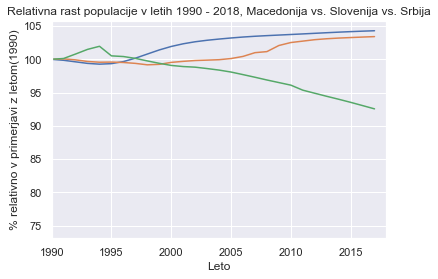

In [38]:
MacReference = float(Macedonia.Count[Macedonia.Year == 1990])     # casting to float, in order to use for calculations
SloReference = float(Slovenia.Count[Slovenia.Year == 1990])
SerReference = float(Serbia.Count[Serbia.Year == 1990])

MacRelative = pd.to_numeric(Macedonia.Count,errors='coerce') / MacReference  # Note how a series of data is cast into float
SloRelative = pd.to_numeric(Slovenia.Count,errors='coerce') / SloReference 
SerRelative = pd.to_numeric(Serbia.Count,errors='coerce') / SerReference 

plt.plot(Macedonia.Year, MacRelative * 100)    # multiply by 100 to make it percentage
plt.plot(Slovenia.Year, SloRelative * 100)
plt.plot(Serbia.Year, SerRelative * 100)
plt.xlim([1990,2018])
plt.title("Relativna rast populacije v letih 1990 - 2018, Macedonija vs. Slovenija vs. Srbija")
plt.xlabel("Leto")
plt.ylabel("% relativno v primerjavi z letom(1990)")
plt.show()

*Vaje in nadaljnje branje*: 
- Poskusite spremeniti barve črt tako, da se ujemajo z barvami športnih reprezentanc treh držav (Makedonija: rdeča, Slovenija: zelena, Srbija: modra). 
- Poskusite omejiti navpično os na ustrezen del grafa.
- Eksperimentirajte s slogi črt (polne, črtkane, pikčaste ...) in označevalci črt (krog, trikotnik, zvezda ...).

Dokumentacijo o ustrezni sintaksi najdete tukaj [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)